# Uncertainty Experiment Evaluation

## Proactive Experiment

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [132]:
file_proactive = "data/Proactive/m2_UncertaintyProactiveExperiment_2022-01-20_22-13-48.csv"
file_predictive = "data/Predictive/m2_UncertaintyPredictiveExperiment_2022-01-21_06-21-52.csv"
file_proactive_reactive = "data/Reactive/m2_UncertaintyReactiveExperiment_2022-01-22_19-37-19.csv"

In [133]:
df_proactive_frame = pd.read_csv(file_proactive).drop(['robustness', 'robustness_uncertainty', 'robustness_measure'], axis=1)
df_proactive_frame['makespan_std'] = df_proactive_frame['makespan'] - df_proactive_frame['makespan-optimum']
df_proactive_frame['makespan_uncertainty_std'] = df_proactive_frame['makespan_uncertainty'] - df_proactive_frame['makespan-optimum']
df_proactive_frame['makespan_uncertainty_baseline_delay'] = df_proactive_frame['makespan_uncertainty_std'] - df_proactive_frame['makespan_std']
list_ordering = {"RandomSolver": 0, "HillClimbing": 1, "TabuSearch": 2, "SimulatedAnnealing": 3, "GeneticAlgorithm": 4}
df_proactive_frame["solver"] = pd.Categorical(df_proactive_frame["solver"], categories=list_ordering)
df_proactive_frame.head(100)

,benchmark,solver,iterations,makespan-optimum,makespan,uncertainty_percentage,makespan_uncertainty,makespan_std,makespan_uncertainty_std,makespan_uncertainty_baseline_delay
0,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,34,0.0,34,0.0,0.0,0.0
1,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,34,0.0,34,0.0,0.0,0.0
2,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,34,0.0,34,0.0,0.0,0.0
3,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,34,0.0,34,0.0,0.0,0.0
4,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,34,0.0,34,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,34,0.0,34,0.0,0.0,0.0
96,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,34,0.0,34,0.0,0.0,0.0
97,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,34,0.0,34,0.0,0.0,0.0
98,m2.mm/m210_1.mm,GeneticAlgorithm,2500,34.0,34,0.0,34,0.0,0.0,0.0


In [134]:
df_grouped_proactive = df_proactive_frame.groupby(['uncertainty_percentage'])
df_grouped_proactive_solver_iterations = df_proactive_frame.groupby(['uncertainty_percentage', 'solver', 'iterations'])['makespan_uncertainty_std']


### Significance Calculation

In [135]:
proactive_describe = df_grouped_proactive_solver_iterations.describe()[['mean', 'std']]

# print(proactive_describe.to_latex(float_format="{:0.2f}".format))
blub = proactive_describe.reset_index().set_index(['solver', 'iterations'])
blub.pivot(columns='uncertainty_percentage')

mean                                \
uncertainty_percentage             0.00      0.05      0.10      0.20   
solver             iterations                                           
RandomSolver       500         2.961806  3.825694  4.607083  6.114097   
                   1000        2.321799  3.213080  4.053426  5.580000   
                   2500        1.647059  2.565052  3.398270  4.919170   
                   5000        1.290657  2.212526  3.033426  4.567474   
HillClimbing       500         2.925170  3.776395  4.576395  6.000612   
                   1000        3.040816  3.900476  4.668844  6.101361   
                   2500        2.897959  3.767755  4.560952  5.992993   
                   5000        2.867347  3.775306  4.577483  6.043878   
TabuSearch         500         1.374150  2.250408  3.016667  4.490136   
                   1000        1.129252  1.985918  2.791020  4.257211   
                   2500        0.768707  1.652993  2.456667  3.932449   
                   5000        0.666667  1.549864  2.354150  3.825102   
SimulatedAnnealing 500         1.887755  2.739048  3.497823  4.985646   
                   1000        1.187075  2.083469  2.897007  4.345918   
                   2500        0.741497  1.597891  2.379116  3.833605   
                   5000        0.500000  1.406531  2.235986  3.669048   
GeneticAlgorithm   500         1.397959  2.217891  2.988163  4.461837   
                   1000        0.625850  1.458776  2.238095  3.697415   
                   2500        0.360544  1.191565  1.984694  3.449456   
                   5000        0.255102  1.101769  1.902245  3.341973   

                                    std                                
uncertainty_percentage             0.00      0.05      0.10      0.20  
solver             iterations                                          
RandomSolver       500         3.171477  3.547193  3.804487  4.178774  
                   1000        2.674508  3.096225  3.391668  3.784272  
                   2500        2.293443  2.790557  3.040991  3.443257  
                   5000        1.863559  2.422418  2.768215  3.197587  
HillClimbing       500         3.446674  3.714852  3.907698  4.154976  
                   1000        3.502067  3.780668  3.951780  4.201074  
                   2500        3.542353  3.828783  4.052687  4.310459  
                   5000        3.395704  3.799027  4.022022  4.242807  
TabuSearch         500         1.897829  2.307435  2.574357  2.881207  
                   1000        1.896255  2.222076  2.423242  2.748729  
                   2500        1.452554  1.884857  2.172746  2.514505  
                   5000        1.379356  1.776942  2.043315  2.349191  
SimulatedAnnealing 500         2.306013  2.599735  2.803652  3.108532  
                   1000        1.746495  2.174079  2.448907  2.725858  
                   2500        1.254089  1.701241  1.932992  2.299457  
                   5000        1.035955  1.732553  2.177952  2.480524  
GeneticAlgorithm   500         1.888481  2.276952  2.539704  2.945009  
                   1000        1.114024  1.674597  2.020520  2.424394  
                   2500        0.741834  1.402877  1.757330  2.163993  
                   5000        0.638545  1.331245  1.738080  2.135232

In [136]:
print(blub.pivot(columns='uncertainty_percentage').to_latex(float_format="{:0.2f}".format))

\begin{tabular}{llrrrrrrrr}
\toprule
                 & {} & \multicolumn{4}{l}{mean} & \multicolumn{4}{l}{std} \\
                 & uncertainty\_percentage & 0.00 & 0.05 & 0.10 & 0.20 & 0.00 & 0.05 & 0.10 & 0.20 \\
solver & iterations &      &      &      &      &      &      &      &      \\
\midrule
RandomSolver & 500  & 2.96 & 3.83 & 4.61 & 6.11 & 3.17 & 3.55 & 3.80 & 4.18 \\
                 & 1000 & 2.32 & 3.21 & 4.05 & 5.58 & 2.67 & 3.10 & 3.39 & 3.78 \\
                 & 2500 & 1.65 & 2.57 & 3.40 & 4.92 & 2.29 & 2.79 & 3.04 & 3.44 \\
                 & 5000 & 1.29 & 2.21 & 3.03 & 4.57 & 1.86 & 2.42 & 2.77 & 3.20 \\
HillClimbing & 500  & 2.93 & 3.78 & 4.58 & 6.00 & 3.45 & 3.71 & 3.91 & 4.15 \\
                 & 1000 & 3.04 & 3.90 & 4.67 & 6.10 & 3.50 & 3.78 & 3.95 & 4.20 \\
                 & 2500 & 2.90 & 3.77 & 4.56 & 5.99 & 3.54 & 3.83 & 4.05 & 4.31 \\
                 & 5000 & 2.87 & 3.78 & 4.58 & 6.04 & 3.40 & 3.80 & 4.02 & 4.24 \\
TabuSearch & 500  & 1.37 & 2.25 & 3.02 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray fro

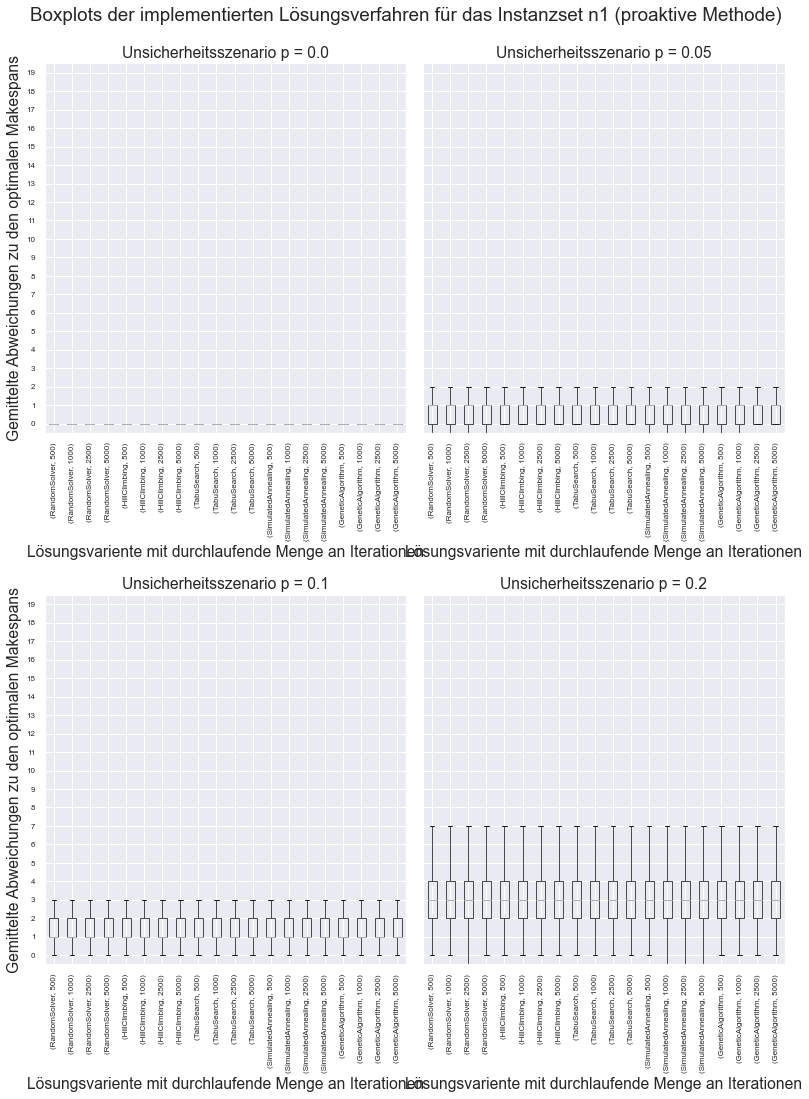

In [137]:
# plt.title("Boxplots der implementierten Lösungsverfahren für das Instanzset n1 (proaktive Methode)")
boxplot = df_grouped_proactive.boxplot(column="makespan_uncertainty_baseline_delay", by=['solver', 'iterations'], showfliers=False, rot=90, fontsize=8, figsize=(11, 15))
plt.ylim(-0.5, 19.5)
plt.yticks(np.arange(0, 19.5, step=1))
plt.tight_layout()
plt.suptitle("Boxplots der implementierten Lösungsverfahren für das Instanzset n1 (proaktive Methode)", y=1.02)

for i, v in boxplot.items():
    boxplot[i].set_title("Unsicherheitsszenario p = " + boxplot[i].get_title())
    boxplot[i].set_xlabel("Lösungsvariente mit durchlaufende Menge an Iterationen")
    boxplot[i].set_ylabel("Gemittelte Abweichungen zu den optimalen Makespans")
plt.show()

## Predictive Experiment

In [138]:
df_predictive_frame = pd.read_csv(file_predictive).drop(['robustness', 'robustness_uncertainty', 'robustness_measure'], axis=1)
df_predictive_frame['makespan_std'] = df_predictive_frame['makespan'] - df_predictive_frame['makespan-optimum']
df_predictive_frame['makespan_uncertainty_std'] = df_predictive_frame['makespan_uncertainty'] - df_predictive_frame['makespan-optimum']
df_predictive_frame['makespan_uncertainty_baseline_delay'] = df_predictive_frame['makespan_uncertainty_std'] - df_predictive_frame['makespan_std']
list_ordering = {"RandomSolver": 0, "HillClimbing": 1, "TabuSearch": 2, "SimulatedAnnealing": 3, "GeneticAlgorithm": 4}
df_predictive_frame["solver"] = pd.Categorical(df_predictive_frame["solver"], categories=list_ordering)
df_predictive_frame.head(20)

FileNotFoundError: [Errno 2] File data/Predictive/m2_UncertaintyPredictiveExperiment_2022-01-21_06-21-52 does not exist: 'data/Predictive/m2_UncertaintyPredictiveExperiment_2022-01-21_06-21-52'

In [ ]:
df_grouped_predictive = df_predictive_frame.groupby(['uncertainty_percentage'])
df_grouped_predictive_solver_iterations = df_predictive_frame.groupby(['uncertainty_percentage', 'solver', 'iterations'])['makespan_uncertainty_std']

### Significance Test

In [ ]:

list = []
df_grouped_predictive_solver_iterations.apply(lambda df: list.append(df))
freiheitsgrad = len(list) - 1
print("Freiheitsgrad:", freiheitsgrad)

stats.kruskal(*list)

Freiheitsgrad: 79


KruskalResult(statistic=576957.9796878208, pvalue=0.0)

In [ ]:
predictive_describe = df_grouped_predictive_solver_iterations.describe()[['mean', 'std']]

# print(proactive_describe.to_latex(float_format="{:0.2f}".format))
blub = predictive_describe.reset_index().set_index(['solver', 'iterations'])
uncertainty_describe = blub.pivot(columns='uncertainty_percentage')
uncertainty_describe

mean                                \
uncertainty_percentage             0.00      0.05      0.10      0.20   
solver             iterations                                           
RandomSolver       500         6.164062  6.972708  7.736615  9.214688   
                   1000        5.429688  6.274687  7.043281  8.559010   
                   2500        4.466146  5.284531  6.093385  7.540208   
                   5000        3.895833  4.701510  5.483385  6.948229   
HillClimbing       500         2.562500  3.412344  4.202396  5.698750   
                   1000        2.395833  3.216927  4.003281  5.455156   
                   2500        2.406250  3.251198  4.034844  5.517448   
                   5000        2.419271  3.257604  4.048125  5.550208   
TabuSearch         500         1.601562  2.470312  3.267083  4.758229   
                   1000        1.263021  2.115469  2.895417  4.383750   
                   2500        0.856771  1.702708  2.488958  3.999948   
                   5000        0.609375  1.462500  2.255729  3.748854   
SimulatedAnnealing 500         2.513021  3.377552  4.201146  5.712813   
                   1000        1.736979  2.598073  3.402656  4.866406   
                   2500        0.921875  1.787865  2.553542  4.064635   
                   5000        0.625000  1.484115  2.282396  3.777135   
GeneticAlgorithm   500         2.174479  2.990885  3.768229  5.251510   
                   1000        1.093750  1.921667  2.700417  4.175365   
                   2500        0.567708  1.419479  2.203594  3.674583   
                   5000        0.434896  1.267240  2.054063  3.536406   

                                    std                                
uncertainty_percentage             0.00      0.05      0.10      0.20  
solver             iterations                                          
RandomSolver       500         3.276685  3.554269  3.783760  4.155708  
                   1000        3.162402  3.530431  3.775823  4.171059  
                   2500        2.736572  3.036066  3.266658  3.625374  
                   5000        2.598060  2.889553  3.103093  3.460917  
HillClimbing       500         2.940678  3.241134  3.461646  3.844289  
                   1000        2.630932  2.949295  3.209435  3.558397  
                   2500        2.763592  3.037463  3.216980  3.562309  
                   5000        2.926028  3.207366  3.430829  3.803617  
TabuSearch         500         2.169949  2.522497  2.788893  3.100061  
                   1000        1.964869  2.297556  2.526344  2.912250  
                   2500        1.550513  1.947151  2.230735  2.624543  
                   5000        1.326259  1.711541  1.970568  2.338897  
SimulatedAnnealing 500         2.649723  3.078112  3.362186  3.791828  
                   1000        2.245676  2.612571  2.862584  3.172295  
                   2500        1.286639  1.819316  2.126782  2.543182  
                   5000        1.005221  1.601102  1.903156  2.317222  
GeneticAlgorithm   500         2.152640  2.423768  2.613461  2.939610  
                   1000        1.373733  1.764513  2.029739  2.416549  
                   2500        0.901757  1.429845  1.737338  2.160964  
                   5000        0.797759  1.348178  1.690703  2.102392

In [ ]:
print(uncertainty_describe.to_latex(float_format="{:0.2f}".format))

\begin{tabular}{llrrrrrrrr}
\toprule
                 & {} & \multicolumn{4}{l}{mean} & \multicolumn{4}{l}{std} \\
                 & uncertainty\_percentage & 0.00 & 0.05 & 0.10 & 0.20 & 0.00 & 0.05 & 0.10 & 0.20 \\
solver & iterations &      &      &      &      &      &      &      &      \\
\midrule
RandomSolver & 500  & 6.16 & 6.97 & 7.74 & 9.21 & 3.28 & 3.55 & 3.78 & 4.16 \\
                 & 1000 & 5.43 & 6.27 & 7.04 & 8.56 & 3.16 & 3.53 & 3.78 & 4.17 \\
                 & 2500 & 4.47 & 5.28 & 6.09 & 7.54 & 2.74 & 3.04 & 3.27 & 3.63 \\
                 & 5000 & 3.90 & 4.70 & 5.48 & 6.95 & 2.60 & 2.89 & 3.10 & 3.46 \\
HillClimbing & 500  & 2.56 & 3.41 & 4.20 & 5.70 & 2.94 & 3.24 & 3.46 & 3.84 \\
                 & 1000 & 2.40 & 3.22 & 4.00 & 5.46 & 2.63 & 2.95 & 3.21 & 3.56 \\
                 & 2500 & 2.41 & 3.25 & 4.03 & 5.52 & 2.76 & 3.04 & 3.22 & 3.56 \\
                 & 5000 & 2.42 & 3.26 & 4.05 & 5.55 & 2.93 & 3.21 & 3.43 & 3.80 \\
TabuSearch & 500  & 1.60 & 2.47 & 3.27 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


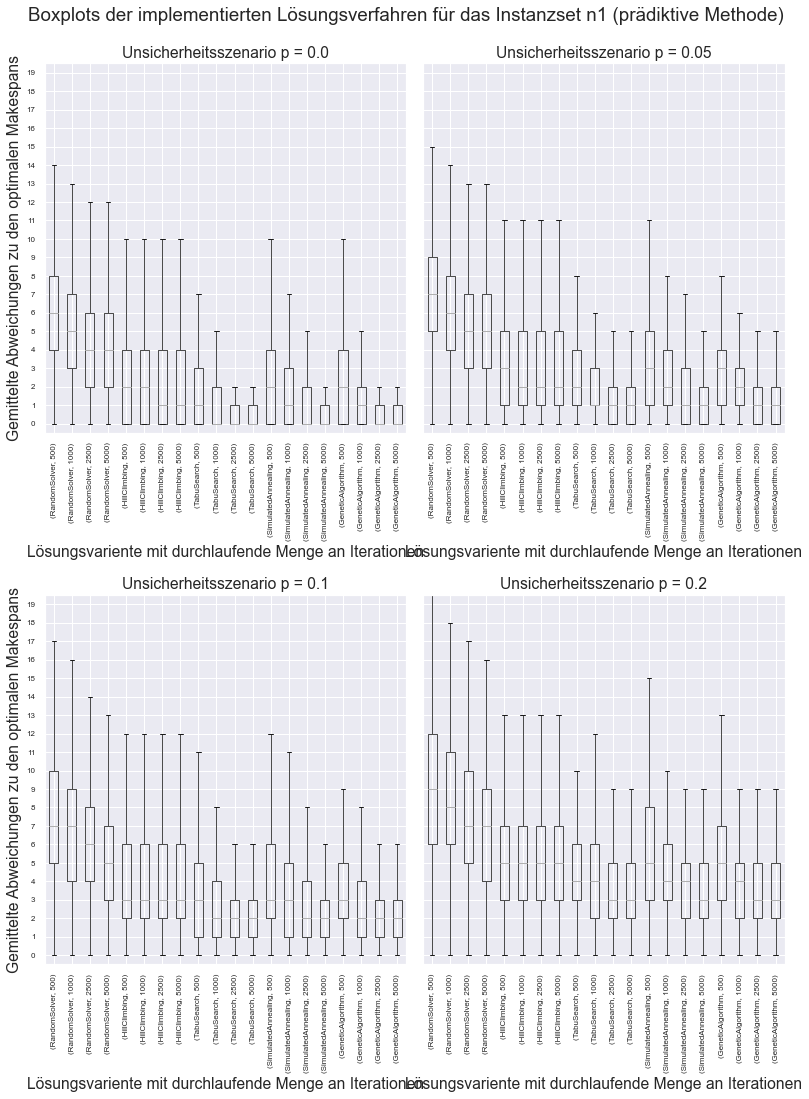

In [ ]:
boxplot = df_grouped_predictive.boxplot(column="makespan_uncertainty_std", by=['solver', 'iterations'], showfliers=False, rot=90, fontsize=8, figsize=(11, 15))

plt.ylim(-0.5, 19.5)
plt.yticks(np.arange(0, 19.5, step=1))
plt.tight_layout()
plt.suptitle("Boxplots der implementierten Lösungsverfahren für das Instanzset n1 (prädiktive Methode)", y=1.02)

for i, v in boxplot.items():
    boxplot[i].set_title("Unsicherheitsszenario p = " + boxplot[i].get_title())
    boxplot[i].set_xlabel("Lösungsvariente mit durchlaufende Menge an Iterationen")
    boxplot[i].set_ylabel("Gemittelte Abweichungen zu den optimalen Makespans")

boxplot[0].get_figure().show()

## Comparison to Proactive

In [ ]:
results_proactive = {}
results_predictive = {}

results_test = {}

def assign(dict, df, uncertainty_entry, iteration_entry):
    dict[uncertainty_entry][iteration_entry].append(df) 

for uncertainty_entry in df_proactive_frame['uncertainty_percentage'].unique():
    results_proactive[uncertainty_entry] = {}
    results_predictive[uncertainty_entry] = {}
    results_test[uncertainty_entry] = {}

    for iteration_entry in sorted(df_proactive_frame['iterations'].unique()):
        results_proactive[uncertainty_entry][iteration_entry] = []
        results_predictive[uncertainty_entry][iteration_entry] = []
        df_proactive_frame[(df_proactive_frame['iterations'] == iteration_entry) & (df_proactive_frame['uncertainty_percentage'] == uncertainty_entry) & (df_proactive_frame['solver'] == 'GeneticAlgorithm')]['makespan_uncertainty_std'].apply(lambda df: assign(results_proactive, df, uncertainty_entry, iteration_entry))
        df_predictive_frame[(df_predictive_frame['iterations'] == iteration_entry) & (df_predictive_frame['uncertainty_percentage'] == uncertainty_entry) & (df_predictive_frame['solver'] == 'GeneticAlgorithm')]['makespan_uncertainty_std'].apply(lambda df: assign(results_predictive, df, uncertainty_entry, iteration_entry))

#for uncertainty_entry in results_proactive:
#    for iteration_entry in results_proactive[uncertainty_entry]:
#        results_test[uncertainty_entry][iteration_entry] = stats.mannwhitneyu(results_proactive[uncertainty_entry][iteration_entry], results_predictive[uncertainty_entry][iteration_entry])


In [ ]:
results_test

{0.0: {}, 0.05: {}, 0.1: {}, 0.2: {}}

## Proactive-Reactive

In [ ]:
df_pro_reactive_frame = pd.read_csv(file_proactive_reactive).drop(['robustness', 'robustness_uncertainty', 'robustness_measure'], axis=1)
df_pro_reactive_frame['makespan_std'] = df_pro_reactive_frame['makespan'] - df_pro_reactive_frame['makespan-optimum']
df_pro_reactive_frame['makespan_uncertainty_std'] = df_pro_reactive_frame['makespan_uncertainty'] - df_pro_reactive_frame['makespan-optimum']
df_pro_reactive_frame['makespan_uncertainty_baseline_delay'] = df_pro_reactive_frame['makespan_uncertainty_std'] - df_pro_reactive_frame['makespan_std']
list_ordering = {"RandomSolver": 0, "HillClimbing": 1, "TabuSearch": 2, "SimulatedAnnealing": 3, "GeneticAlgorithm": 4}
df_pro_reactive_frame["solver"] = pd.Categorical(df_pro_reactive_frame["solver"], categories=list_ordering)
df_pro_reactive_frame.head(20)

,benchmark,solver,iterations,makespan-optimum,makespan,uncertainty_percentage,makespan_uncertainty,makespan_std,makespan_uncertainty_std,makespan_uncertainty_baseline_delay
0,n1.mm/n110_1.mm,GeneticAlgorithm,2500,17.0,17,0.0,17,0.0,0.0,0.0
1,n1.mm/n110_1.mm,GeneticAlgorithm,2500,17.0,17,0.0,17,0.0,0.0,0.0
2,n1.mm/n110_1.mm,GeneticAlgorithm,2500,17.0,17,0.0,17,0.0,0.0,0.0
3,n1.mm/n110_1.mm,GeneticAlgorithm,2500,17.0,17,0.0,17,0.0,0.0,0.0
4,n1.mm/n110_1.mm,GeneticAlgorithm,2500,17.0,17,0.0,17,0.0,0.0,0.0
5,n1.mm/n110_1.mm,GeneticAlgorithm,2500,17.0,17,0.0,17,0.0,0.0,0.0
6,n1.mm/n110_1.mm,GeneticAlgorithm,2500,17.0,17,0.0,17,0.0,0.0,0.0
7,n1.mm/n110_1.mm,GeneticAlgorithm,2500,17.0,17,0.0,17,0.0,0.0,0.0
8,n1.mm/n110_1.mm,GeneticAlgorithm,2500,17.0,17,0.0,17,0.0,0.0,0.0
9,n1.mm/n110_1.mm,GeneticAlgorithm,2500,17.0,17,0.0,17,0.0,0.0,0.0


In [ ]:
df_grouped_pro_reactive = df_pro_reactive_frame.groupby(['uncertainty_percentage'])
df_grouped_pro_reactive_solver_iterations = df_pro_reactive_frame.groupby(['uncertainty_percentage', 'solver', 'iterations'])['makespan_uncertainty_std']

In [ ]:
pro_reactive_describe = df_grouped_pro_reactive_solver_iterations.describe()[['mean', 'std']]

# print(proactive_describe.to_latex(float_format="{:0.2f}".format))
blub = pro_reactive_describe.reset_index().set_index(['solver', 'iterations'])
uncertainty_describe = blub.pivot(columns='uncertainty_percentage')
uncertainty_describe

mean                                \
uncertainty_percentage             0.00      0.05      0.10      0.20   
solver             iterations                                           
RandomSolver       500         6.265625  6.613281  6.968750  7.735677   
                   1000        5.640625  6.033854  6.404948  7.164062   
                   2500        4.687500  5.076823  5.520833  6.366536   
                   5000        3.726562  4.212240  4.660156  5.648438   
HillClimbing       500         3.820312  4.394531  4.929036  5.979167   
                   1000        3.835938  4.440104  4.932292  6.040365   
                   2500        3.640625  4.213542  4.761068  5.835286   
                   5000        3.937500  4.537109  5.103516  6.052083   
TabuSearch         500         1.773438  2.453125  3.168620  4.440755   
                   1000        1.210938  1.957682  2.684896  4.000000   
                   2500        0.976562  1.764974  2.530599  3.942057   
                   5000        0.500000  1.356120  2.096354  3.636719   
SimulatedAnnealing 500         2.906250  3.505208  4.019531  5.208984   
                   1000        1.812500  2.524740  3.171224  4.423177   
                   2500        1.046875  1.811849  2.544922  3.858724   
                   5000        0.671875  1.513672  2.272786  3.666667   
GeneticAlgorithm   500         2.171875  2.781901  3.355469  4.519531   
                   1000        1.148438  1.848958  2.499349  3.903646   
                   2500        0.554688  1.392578  2.158203  3.562500   
                   5000        0.492188  1.323568  2.104167  3.526042   

                                    std                                
uncertainty_percentage             0.00      0.05      0.10      0.20  
solver             iterations                                          
RandomSolver       500         3.506683  3.557466  3.634122  3.881694  
                   1000        3.317079  3.403030  3.476878  3.521239  
                   2500        2.953053  2.999559  3.082295  3.220925  
                   5000        2.452567  2.531214  2.676305  2.849328  
HillClimbing       500         3.513251  3.468886  3.442148  3.412120  
                   1000        3.384835  3.410321  3.406160  3.389339  
                   2500        3.125353  3.151129  3.175159  3.176187  
                   5000        4.064785  4.089542  4.108190  3.964487  
TabuSearch         500         2.198779  2.292975  2.393439  2.653325  
                   1000        1.806188  2.008816  2.170199  2.278922  
                   2500        1.930917  2.134280  2.256018  2.499230  
                   5000        0.992480  1.398045  1.654082  2.039878  
SimulatedAnnealing 500         2.548615  2.592392  2.683939  2.775171  
                   1000        2.139439  2.326600  2.439892  2.700577  
                   2500        1.413897  1.733108  1.895804  2.196584  
                   5000        1.046983  1.477676  1.762568  2.017728  
GeneticAlgorithm   500         2.122414  2.114312  2.203627  2.260468  
                   1000        1.415171  1.584320  1.713712  2.056806  
                   2500        0.891292  1.375039  1.619618  2.057480  
                   5000        0.866272  1.391502  1.617360  2.017668

In [ ]:
print(uncertainty_describe.to_latex(float_format="{:0.2f}".format))

\begin{tabular}{llrrrrrrrr}
\toprule
                 & {} & \multicolumn{4}{l}{mean} & \multicolumn{4}{l}{std} \\
                 & uncertainty\_percentage & 0.00 & 0.05 & 0.10 & 0.20 & 0.00 & 0.05 & 0.10 & 0.20 \\
solver & iterations &      &      &      &      &      &      &      &      \\
\midrule
RandomSolver & 500  & 6.27 & 6.61 & 6.97 & 7.74 & 3.51 & 3.56 & 3.63 & 3.88 \\
                 & 1000 & 5.64 & 6.03 & 6.40 & 7.16 & 3.32 & 3.40 & 3.48 & 3.52 \\
                 & 2500 & 4.69 & 5.08 & 5.52 & 6.37 & 2.95 & 3.00 & 3.08 & 3.22 \\
                 & 5000 & 3.73 & 4.21 & 4.66 & 5.65 & 2.45 & 2.53 & 2.68 & 2.85 \\
HillClimbing & 500  & 3.82 & 4.39 & 4.93 & 5.98 & 3.51 & 3.47 & 3.44 & 3.41 \\
                 & 1000 & 3.84 & 4.44 & 4.93 & 6.04 & 3.38 & 3.41 & 3.41 & 3.39 \\
                 & 2500 & 3.64 & 4.21 & 4.76 & 5.84 & 3.13 & 3.15 & 3.18 & 3.18 \\
                 & 5000 & 3.94 & 4.54 & 5.10 & 6.05 & 4.06 & 4.09 & 4.11 & 3.96 \\
TabuSearch & 500  & 1.77 & 2.45 & 3.17 

## Uncertainty Comparision
General Comparision of every approach

In [ ]:
pro_comparision_describe = pd.concat([df_grouped_proactive_solver_iterations.describe()['mean'], df_grouped_predictive_solver_iterations.describe()['mean'], df_grouped_pro_reactive_solver_iterations.describe()['mean']], keys=["mean_proactive", "mean_predictive", "mean_reactive"], axis=1)

blub = pro_comparision_describe.reset_index().set_index(['solver', 'iterations'])
uncertainty_describe = blub.pivot(columns='uncertainty_percentage')
uncertainty_describe

mean_proactive                                \
uncertainty_percentage                  0.00      0.05      0.10      0.20   
solver             iterations                                                
RandomSolver       500              6.296875  7.146406  7.910052  9.389323   
                   1000             5.507812  6.400052  7.175885  8.690625   
                   2500             4.656250  5.536042  6.341250  7.840937   
                   5000             3.822917  4.695677  5.523438  7.030833   
HillClimbing       500              4.054688  5.040573  5.870885  7.429010   
                   1000             4.104167  5.065104  5.910990  7.423125   
                   2500             3.895833  4.838073  5.689427  7.215729   
                   5000             3.770833  4.742240  5.594323  7.112656   
TabuSearch         500              1.802083  2.774688  3.602813  5.127292   
                   1000             1.226562  2.244167  3.112240  4.642396   
                   2500             0.861979  1.847552  2.707552  4.236562   
                   5000             0.557292  1.541042  2.386198  3.921719   
SimulatedAnnealing 500              2.890625  3.782188  4.593542  6.124635   
                   1000             1.817708  2.777135  3.623229  5.126406   
                   2500             0.963542  1.896042  2.745208  4.257344   
                   5000             0.692708  1.714167  2.578646  4.130729   
GeneticAlgorithm   500              2.278646  3.146146  3.943802  5.466927   
                   1000             1.036458  1.921510  2.743490  4.242760   
                   2500             0.567708  1.481406  2.306042  3.839792   
                   5000             0.458333  1.397031  2.241354  3.786406   

                              mean_predictive                                \
uncertainty_percentage                   0.00      0.05      0.10      0.20   
solver             iterations                                                 
RandomSolver       500               6.164062  6.972708  7.736615  9.214688   
                   1000              5.429688  6.274687  7.043281  8.559010   
                   2500              4.466146  5.284531  6.093385  7.540208   
                   5000              3.895833  4.701510  5.483385  6.948229   
HillClimbing       500               2.562500  3.412344  4.202396  5.698750   
                   1000              2.395833  3.216927  4.003281  5.455156   
                   2500              2.406250  3.251198  4.034844  5.517448   
                   5000              2.419271  3.257604  4.048125  5.550208   
TabuSearch         500               1.601562  2.470312  3.267083  4.758229   
                   1000              1.263021  2.115469  2.895417  4.383750   
                   2500              0.856771  1.702708  2.488958  3.999948   
                   5000              0.609375  1.462500  2.255729  3.748854   
SimulatedAnnealing 500               2.513021  3.377552  4.201146  5.712813   
                   1000              1.736979  2.598073  3.402656  4.866406   
                   2500              0.921875  1.787865  2.553542  4.064635   
                   5000              0.625000  1.484115  2.282396  3.777135   
GeneticAlgorithm   500               2.174479  2.990885  3.768229  5.251510   
                   1000              1.093750  1.921667  2.700417  4.175365   
                   2500              0.567708  1.419479  2.203594  3.674583   
                   5000              0.434896  1.267240  2.054063  3.536406   

                              mean_reactive                                
uncertainty_percentage                 0.00      0.05      0.10      0.20  
solver             iterations                                              
RandomSolver       500             6.265625  6.613281  6.968750  7.735677  
                   1000            5.640625  6.033854  6.404948  7.164062  
                   2500            4.

In [ ]:
print(uncertainty_describe.to_latex(float_format="{:0.2f}".format))

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
                 & {} & \multicolumn{4}{l}{mean\_proactive} & \multicolumn{4}{l}{mean\_predictive} & \multicolumn{4}{l}{mean\_reactive} \\
                 & uncertainty\_percentage &           0.00 & 0.05 & 0.10 & 0.20 &            0.00 & 0.05 & 0.10 & 0.20 &          0.00 & 0.05 & 0.10 & 0.20 \\
solver & iterations &                &      &      &      &                 &      &      &      &               &      &      &      \\
\midrule
RandomSolver & 500  &           6.30 & 7.15 & 7.91 & 9.39 &            6.16 & 6.97 & 7.74 & 9.21 &          6.27 & 6.61 & 6.97 & 7.74 \\
                 & 1000 &           5.51 & 6.40 & 7.18 & 8.69 &            5.43 & 6.27 & 7.04 & 8.56 &          5.64 & 6.03 & 6.40 & 7.16 \\
                 & 2500 &           4.66 & 5.54 & 6.34 & 7.84 &            4.47 & 5.28 & 6.09 & 7.54 &          4.69 & 5.08 & 5.52 & 6.37 \\
                 & 5000 &           3.82 & 4.70 & 5.52 & 7.03 &            3.90 & 4.70 & 5.48 &

In [ ]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

df_proactive_group = df_grouped_proactive_solver_iterations.describe()['mean']
df_predictive_group = df_grouped_predictive_solver_iterations.describe()['mean']
df_reactive_group = df_grouped_pro_reactive_solver_iterations.describe()['mean']

data = pd.concat([df_proactive_group, df_predictive_group, df_reactive_group], keys=["mean_proactive", "mean_predictive", "mean_reactive"], axis=1)
data['1_proactive_to_predictive'] = percentage_change(data['mean_proactive'], data['mean_predictive'])
data['2_proactive_to_reactive'] = percentage_change(data['mean_proactive'], data['mean_reactive'])
data['3_predictive_to_reactive'] = percentage_change(data['mean_predictive'], data['mean_reactive'])

percentage = data.pivot_table(columns='uncertainty_percentage', index=['solver', 'iterations'], values=['1_proactive_to_predictive', '2_proactive_to_reactive', '3_predictive_to_reactive'])
percentage

1_proactive_to_predictive                        \
uncertainty_percentage                             0.00       0.05       0.10   
solver             iterations                                                   
RandomSolver       500                        -2.109181  -2.430563  -2.192621   
                   1000                       -1.418440  -1.958806  -1.847914   
                   2500                       -4.082774  -4.543145  -3.908765   
                   5000                        1.907357   0.124228  -0.725130   
HillClimbing       500                       -36.801541 -32.302462 -28.419727   
                   1000                      -41.624365 -36.488432 -32.273925   
                   2500                      -38.235294 -32.799733 -29.081721   
                   5000                      -35.842541 -31.306630 -27.638696   
TabuSearch         500                       -11.127168 -10.969704  -9.318530   
                   1000                        2.972399  -5.734775  -6.966781   
                   2500                       -0.604230  -7.839765  -8.073483   
                   5000                        9.345794  -5.096661  -5.467642   
SimulatedAnnealing 500                       -13.063063 -10.698449  -8.542338   
                   1000                       -4.441261  -6.447741  -6.087744   
                   2500                       -4.324324  -5.705417  -6.981862   
                   5000                       -9.774436 -13.420637 -11.488588   
GeneticAlgorithm   500                        -4.571429  -4.934940  -4.451869   
                   1000                        5.527638   0.008132  -1.570005   
                   2500                        0.000000  -4.180290  -4.442587   
                   5000                       -5.113636  -9.290534  -8.356183   

                                         2_proactive_to_reactive             \
uncertainty_percentage              0.20                    0.00       0.05   
solver             iterations                                                 
RandomSolver       500         -1.859936               -0.496278  -7.460043   
                   1000        -1.514443                2.411348  -5.721796   
                   2500        -3.835373                0.671141  -8.295074   
                   5000        -1.174884               -2.520436 -10.295374   
HillClimbing       500        -23.290591               -5.780347 -12.816830   
                   1000       -26.511324               -6.535533 -12.339332   
                   2500       -23.535823               -6.550802 -12.908678   
                   5000       -21.967151                4.419890  -4.325598   
TabuSearch         500         -7.198001               -1.589595 -11.589143   
                   1000        -5.571387               -1.273885 -12.765735   
                   2500        -5.585061               13.293051  -4.469597   
                   5000        -4.407878              -10.280374 -11.999797   
SimulatedAnnealing 500         -6.724040                0.540541  -7.323253   
                   1000        -5.071779               -0.286533  -9.088352   
                   2500        -4.526492                8.648649  -4.440446   
                   5000        -8.560081               -3.007519 -11.696342   
GeneticAlgorithm   500         -3.940361               -4.685714 -11.577492   
                   1000        -1.588490               10.804020  -3.775784   
                   2500        -4.302534               -2.293578  -5.996203   
                   5000        -6.602567                7.386364  -5.258547   

                                                    3_predictive_to_reactive  \
uncertainty_percentage              0.10       0.20                     0.00   
solver             iterations                                                  
RandomSolver       500        -11.900074 -17.611982                 1.647655   
                   1000     

In [ ]:
print(percentage.to_latex(float_format="{:0.2f}".format))

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
                 & {} & \multicolumn{4}{l}{1\_proactive\_to\_predictive} & \multicolumn{4}{l}{2\_proactive\_to\_reactive} & \multicolumn{4}{l}{3\_predictive\_to\_reactive} \\
                 & uncertainty\_percentage &                      0.00 &   0.05 &   0.10 &   0.20 &                    0.00 &   0.05 &   0.10 &   0.20 &                     0.00 &   0.05 &   0.10 &   0.20 \\
solver & iterations &                           &        &        &        &                         &        &        &        &                          &        &        &        \\
\midrule
RandomSolver & 500  &                     -2.11 &  -2.43 &  -2.19 &  -1.86 &                   -0.50 &  -7.46 & -11.90 & -17.61 &                     1.65 &  -5.15 &  -9.93 & -16.05 \\
                 & 1000 &                     -1.42 &  -1.96 &  -1.85 &  -1.51 &                    2.41 &  -5.72 & -10.74 & -17.57 &                     3.88 &  -3.84 &  -9.06 & -16.30 \\
        

[Text(44.499999999999986, 0.5, 'Solver, iteration'),
 Text(0.5, 35.5, 'Uncertainty level p')]

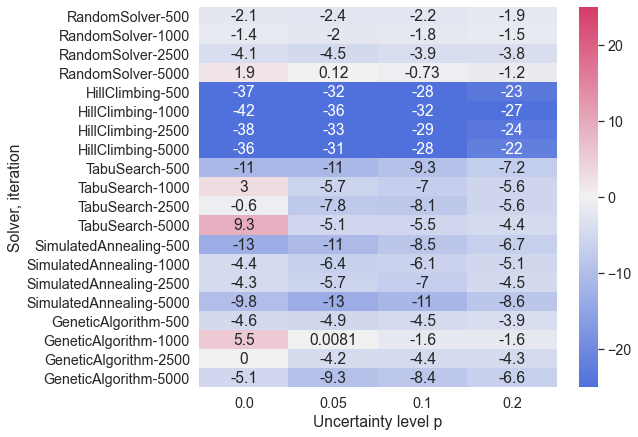

In [ ]:
cmap = sns.diverging_palette(-100, 0, as_cmap=True)
sns.set(font_scale=1.3)
plt.figure(figsize = (8,7))
s = sns.heatmap(percentage['1_proactive_to_predictive'], annot=True, cmap=cmap, vmin=-25, vmax=25)
s.set(xlabel='Uncertainty level p', ylabel='Solver, iteration')

[Text(44.499999999999986, 0.5, 'Solver, iteration'),
 Text(0.5, 35.5, 'Uncertainty level p')]

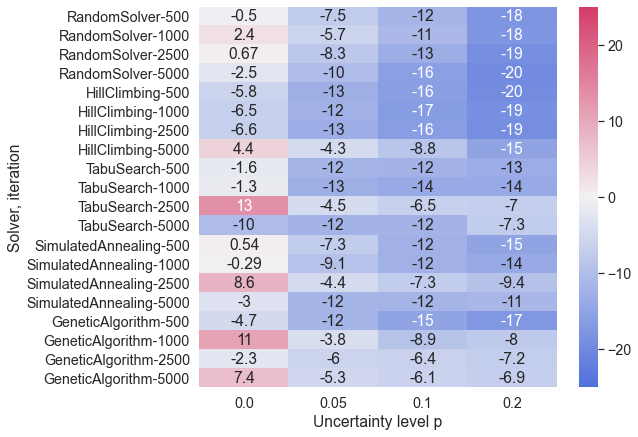

In [ ]:
plt.figure(figsize = (8,7))
s = sns.heatmap(percentage['2_proactive_to_reactive'], annot=True, cmap=cmap, vmin=-25, vmax=25)
s.set(xlabel='Uncertainty level p', ylabel='Solver, iteration')

[Text(44.499999999999986, 0.5, 'Solver, iteration'),
 Text(0.5, 35.5, 'Uncertainty level p')]

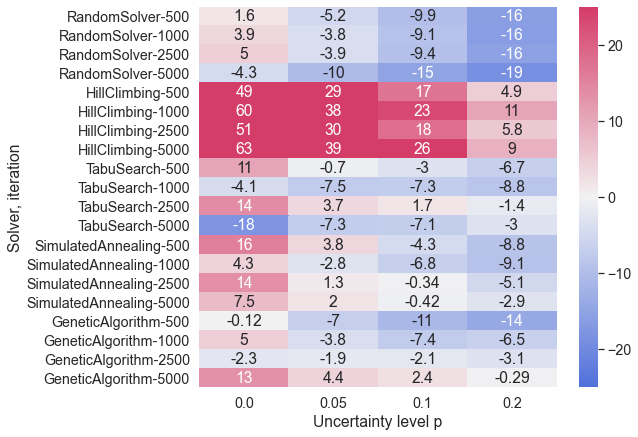

In [ ]:
plt.figure(figsize = (8,7))
s = sns.heatmap(percentage['3_predictive_to_reactive'], annot=True, cmap=cmap, vmin=-25, vmax=25)
s.set(xlabel='Uncertainty level p', ylabel='Solver, iteration')

[Text(0.5, 35.5, 'Uncertainty level p')]

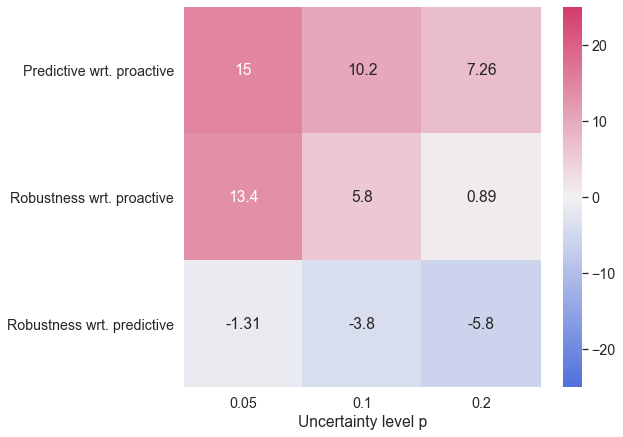

In [ ]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

df_grouped_proactive_solver_iterations = df_proactive_frame[(df_proactive_frame.solver != 'HillClimbing') & (df_proactive_frame.solver != 'RandomSolver') & (df_proactive_frame.uncertainty_percentage != 0)].groupby(['uncertainty_percentage', 'solver', 'iterations'])['makespan_uncertainty_std']
df_grouped_predictive_solver_iterations = df_predictive_frame[(df_predictive_frame.solver != 'HillClimbing') & (df_predictive_frame.solver != 'RandomSolver') & (df_predictive_frame.uncertainty_percentage != 0)].groupby(['uncertainty_percentage', 'solver', 'iterations'])['makespan_uncertainty_std']
df_grouped_pro_reactive_solver_iterations = df_pro_reactive_frame[(df_pro_reactive_frame.solver != 'HillClimbing') & (df_pro_reactive_frame.solver != 'RandomSolver') & (df_pro_reactive_frame.uncertainty_percentage != 0)].groupby(['uncertainty_percentage', 'solver', 'iterations'])['makespan_uncertainty_std']

df_proactive_group = df_grouped_proactive_solver_iterations.describe()['mean']
df_predictive_group = df_grouped_predictive_solver_iterations.describe()['mean']
df_reactive_group = df_grouped_pro_reactive_solver_iterations.describe()['mean']

data = pd.concat([df_proactive_group, df_predictive_group, df_reactive_group], keys=["mean_proactive", "mean_predictive", "mean_reactive"], axis=1)
data['Predictive wrt. proactive'] = percentage_change(data['mean_proactive'], data['mean_predictive'])
data['Robustness wrt. proactive'] = percentage_change(data['mean_proactive'], data['mean_reactive'])
data['Robustness wrt. predictive'] = percentage_change(data['mean_predictive'], data['mean_reactive'])

columns = ['Predictive wrt. proactive', 'Robustness wrt. proactive', 'Robustness wrt. predictive']
data = data.pivot_table(columns='uncertainty_percentage', values=columns)
data = data.reindex(columns)

plt.figure(figsize = (8,7))
s = sns.heatmap(data, annot=True, cmap=cmap, vmin=-25, vmax=25, fmt='.3g')
s.set(xlabel='Uncertainty level p')